# Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [3]:
gen_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Generation Info

In [4]:
print(gen_data.info())
print(gen_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None
        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    41

# Weather Sensor Info

In [5]:
print(weather_data.info())
print(weather_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB
None
        PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000

# Data Cleaning

In [6]:
gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

print(gen_data.isnull().sum())
print(weather_data.isnull().sum())

gen_data.fillna(method='ffill', inplace=True)
weather_data.fillna(method='ffill', inplace=True)

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


<ipython-input-6-6193b64c3f3d>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'])


In [7]:
# Merge Data
merged_data = pd.merge(gen_data, weather_data, on='DATE_TIME')

# EDA

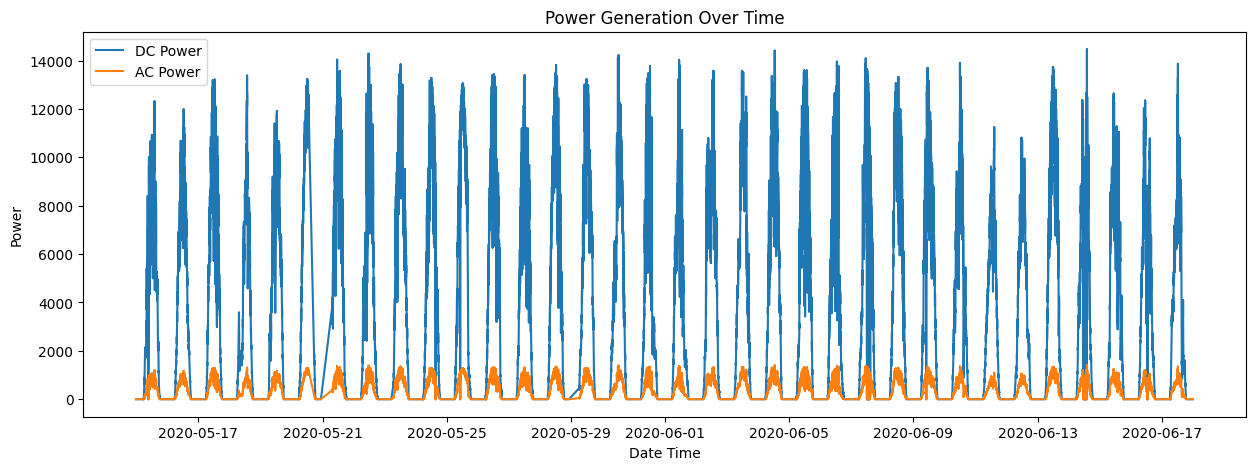

In [8]:
# Time series plot of power generation
plt.figure(figsize=(15, 5))
plt.plot(merged_data['DATE_TIME'], merged_data['DC_POWER'], label='DC Power')
plt.plot(merged_data['DATE_TIME'], merged_data['AC_POWER'], label='AC Power')
plt.legend()
plt.title('Power Generation Over Time')
plt.xlabel('Date Time')
plt.ylabel('Power')
plt.show()

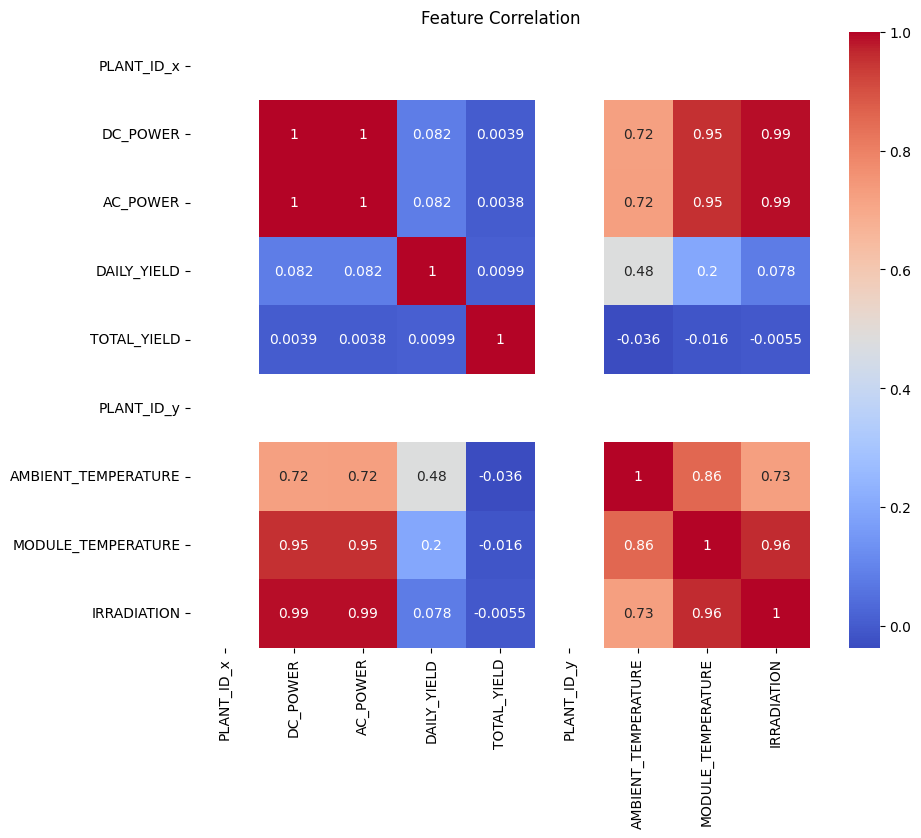

In [9]:
# Correlation Heatmap
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = merged_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Feature Engineering

In [10]:
merged_data['hour'] = merged_data['DATE_TIME'].dt.hour
merged_data['day_of_week'] = merged_data['DATE_TIME'].dt.dayofweek
merged_data['month'] = merged_data['DATE_TIME'].dt.month

# Define features and target
X = merged_data[['hour', 'day_of_week', 'month', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = merged_data['DC_POWER']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation

In [11]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [12]:
# Print MAE and R2 scores for all models
print(f'Linear Regression MAE: {mae_lr}, R2: {r2_lr}')
print(f'Ridge Regression MAE: {mae_ridge}, R2: {r2_ridge}')
print(f'Lasso Regression MAE: {mae_lasso}, R2: {r2_lasso}')
print(f'Decision Tree MAE: {mae_dt}, R2: {r2_dt}')
print(f'Random Forest MAE: {mae_rf}, R2: {r2_rf}')
print(f'Gradient Boosting MAE: {mae_gb}, R2: {r2_gb}')

Linear Regression MAE: 266.85226358684463, R2: 0.9802064303596733
Ridge Regression MAE: 267.0909740407287, R2: 0.9801960477984856
Lasso Regression MAE: 267.675368202489, R2: 0.9801480146810656
Decision Tree MAE: 168.39232757839918, R2: 0.986403892697653
Random Forest MAE: 168.37970679018332, R2: 0.9863742970661792
Gradient Boosting MAE: 191.69556557971907, R2: 0.984987320252638


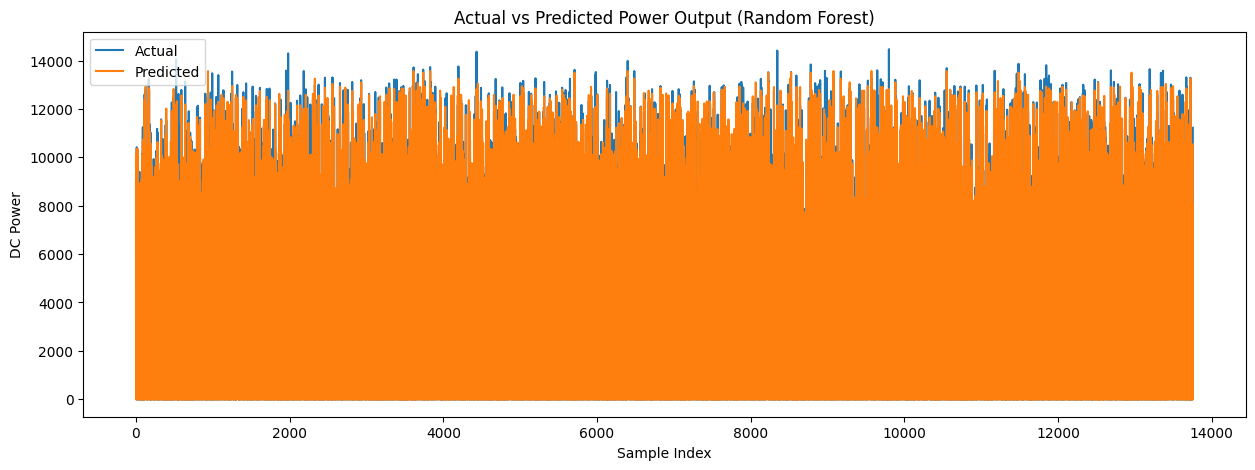

In [17]:
# Actual vs Predicted RF
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Power Output (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('DC Power')
plt.show()

In [20]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

In [21]:
# Evaluate the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MAE: {mae_rf}, R2: {r2_rf}')

Random Forest MAE: 172.26527151182694, R2: 0.9861977308427292


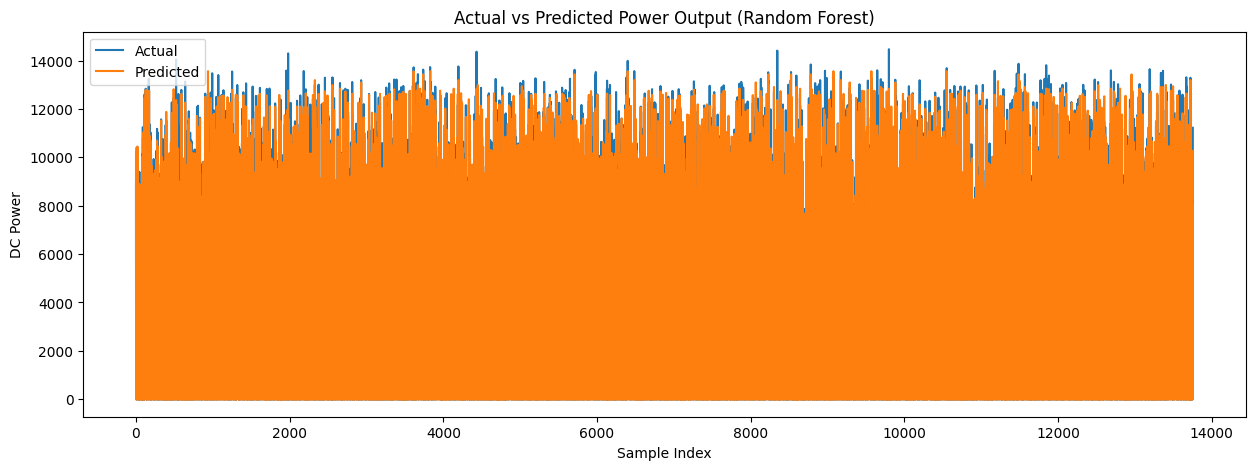

Best Random Forest Model: RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=200,
                      random_state=42)


In [23]:
# Plot Actual vs Predicted
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Power Output (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('DC Power')
plt.show()

# Random Forest performance
print(f'Best Random Forest Model: {best_rf_model}')